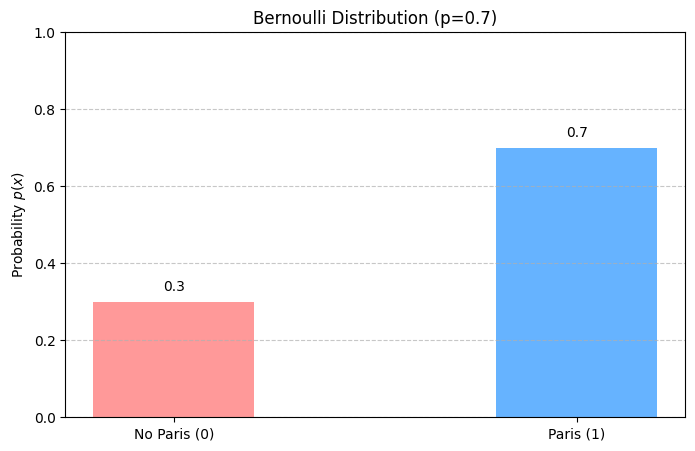

In [3]:
# Bernouille distribution
import matplotlib.pyplot as plt

# Parameters
p = 0.7  # Probability of success (going to Paris)
q = round(1 - p, 1)  # Probability of failure
outcomes = [0, 1]
probabilities = [q, p]

# Create the plot
plt.figure(figsize=(8, 5))
bars = plt.bar(outcomes, probabilities, color=['#ff9999', '#66b3ff'], width=0.4)

# Formatting
plt.xticks(outcomes, ['No Paris (0)', 'Paris (1)'])
plt.ylim(0, 1)
plt.ylabel('Probability $p(x)$')
plt.title(f'Bernoulli Distribution (p={p})')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, yval, ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

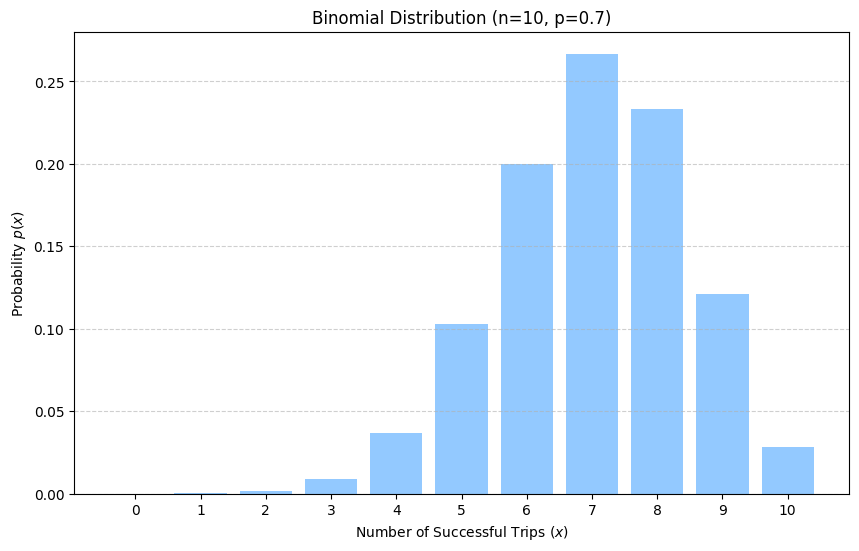

In [13]:
# Binomial distribution
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

# Parameters
n = 10  # Years of travel
p = 0.7 # Prob of going to Paris
x = np.arange(0, n + 1)
success_probs = binom.pmf(x, n, p)

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(x, success_probs, color='#66b3ff', alpha=0.7)

# Formatting
plt.xticks(x)
plt.xlabel('Number of Successful Trips ($x$)')
plt.ylabel('Probability $p(x)$')
plt.title(f'Binomial Distribution (n={n}, p={p})')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

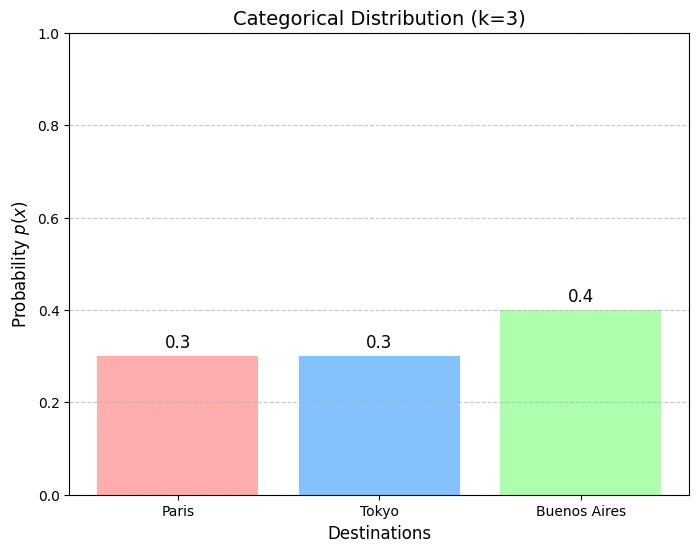

In [20]:
# Categorical distribution
import matplotlib.pyplot as plt

# Data for the categorical distribution
categories = ['Paris', 'Tokyo', 'Buenos Aires']
probabilities = [0.3, 0.3, 0.4]
colors = ['#ff9999', '#66b3ff', '#99ff99'] # Soft red, blue, and green

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, probabilities, color=colors, alpha=0.8)

# Add the probability values on top of each bar for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.1f}',
             ha='center', va='bottom', fontsize=12)

# Add labels and formatting
plt.ylim(0, 1)  # Probabilities are always between 0 and 1
plt.ylabel('Probability $p(x)$', fontsize=12)
plt.xlabel('Destinations', fontsize=12)
plt.title('Categorical Distribution (k=3)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)


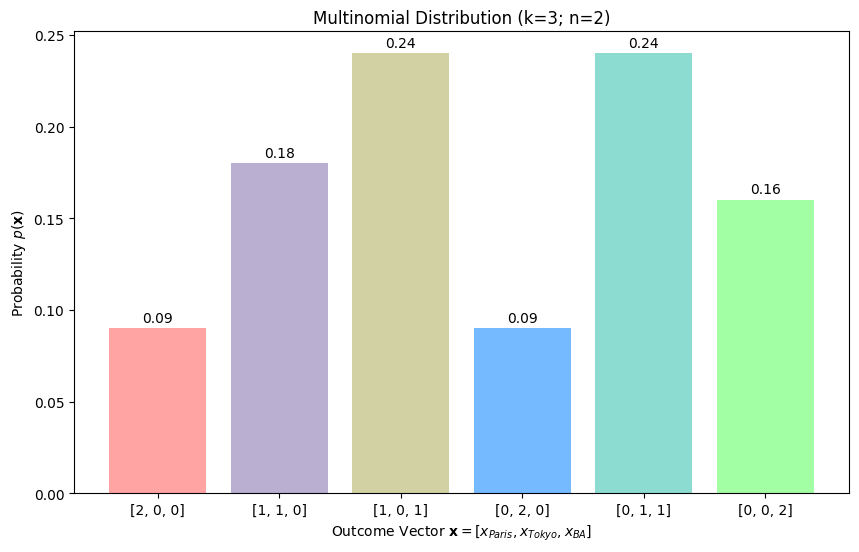

In [33]:
# Multinomial distribution
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import factorial

def multinomial_pmf(x, n, p):
    coeff = factorial(n) / np.prod(factorial(x))
    prob = np.prod(np.power(p, x))
    return coeff * prob

n = 2
p = [0.3, 0.3, 0.4]
base_colors = {'Paris': '#ff9999', 'Tokyo': '#66b3ff', 'BA': '#99ff99'}

# Helper to mix hex colors for the 'mixed' trip bars
def mix(c1, c2):
    rgb1 = np.array([int(c1[i:i+2], 16) for i in (1, 3, 5)]) / 255
    rgb2 = np.array([int(c2[i:i+2], 16) for i in (1, 3, 5)]) / 255
    return (rgb1 + rgb2) / 2

outcomes, probs, colors = [], [], []

for x1 in range(n + 1):
    for x2 in range(n + 1 - x1):
        x3 = n - x1 - x2
        x = [x1, x2, x3]
        outcomes.append(str(x))
        probs.append(multinomial_pmf(x, n, p))
        # Assign colors based on counts
        if x1 == 2: colors.append(base_colors['Paris'])
        elif x2 == 2: colors.append(base_colors['Tokyo'])
        elif x3 == 2: colors.append(base_colors['BA'])
        elif x1 == 1 and x2 == 1: colors.append(mix(base_colors['Paris'], base_colors['Tokyo']))
        elif x1 == 1 and x3 == 1: colors.append(mix(base_colors['Paris'], base_colors['BA']))
        else: colors.append(mix(base_colors['Tokyo'], base_colors['BA']))

outcomes.reverse()
probs.reverse()
colors.reverse()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(outcomes, probs, color=colors, alpha=0.9)
plt.title(f'Multinomial Distribution (k=3; n=2)')
plt.xlabel('Outcome Vector $\mathbf{x} = [x_{Paris}, x_{Tokyo}, x_{BA}]$')
plt.ylabel('Probability $p(\mathbf{x})$')

# Add labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002,
             f'{bar.get_height():.2f}', ha='center', va='bottom')